In [1]:
import pandas as pd

01. Build a model to estimate the proportion of water on a planet
For beginning - Assume planet is in shape of 4 sided pyramid , and water is present will cover the whole side

In [2]:
# define the observed samples 
samples = ['W','L','W','W','W','L','W','L','W']

In [3]:
W = sum([1 for sample in samples if sample == 'W'])
L = sum([1 for sample in samples if sample == 'L'])

In [4]:
W,L

(6, 3)

In [5]:
# define the possible proportions
p = [0,0.25,0.5,0.75,1.0]

In [6]:
bayesian_update = pd.DataFrame(p,columns=['p'])

In [7]:
bayesian_update['ways'] = bayesian_update['p'].apply(lambda x : (4*x)**W * (4*(1-x))**L)

In [8]:
bayesian_update['prob'] = bayesian_update['ways'] / bayesian_update['ways'].sum()

In [9]:
bayesian_update

,p,ways,prob
0,0.00,0.0,0.000000
1,0.25,27.0,0.021293
2,0.50,512.0,0.403785
3,0.75,729.0,0.574921
4,1.00,0.0,0.000000


02. Create a function to simulate globe toss

In [10]:
import random


In [11]:
def globe_toss(p=0.5,n=10):
    return [random.choices(['W','L'],[p,1-p])[0] for i in range(n)]

In [12]:
globe_toss(0.7,10)

['W', 'L', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'W']

In [13]:
# test in extreme 
globe_toss(1,10)

['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']

In [14]:
globe_toss(0,10)

['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L']

In [15]:
#
sum([1 for toss in globe_toss(0.5,10000) if toss=='W'])/10000

0.5056

In [16]:
# function to calculate posterior
def compute_posterior(given_sample,probs = [0,0.25,0.5,0.75,1.0]):
    W = sum([1 for sample in given_sample if sample == 'W']) # no of tosses which came up with water
    L = sum([1 for sample in given_sample if sample == 'L']) # no of tosses which came up with land
    bayesian_update = pd.DataFrame(probs,columns=['p'])
    bayesian_update['ways'] = bayesian_update['p'].apply(lambda x : (4*x)**W * (4*(1-x))**L)
    bayesian_update['post'] = bayesian_update['ways'] / bayesian_update['ways'].sum()
    return bayesian_update

In [17]:
compute_posterior(samples,)

,p,ways,post
0,0.00,0.0,0.000000
1,0.25,27.0,0.021293
2,0.50,512.0,0.403785
3,0.75,729.0,0.574921
4,1.00,0.0,0.000000


03. Get the beta samples of size 1000

In [18]:
import numpy as np

In [19]:
post_samples = np.random.beta(6+1,3+1,10000) # function shows a-1 and b-1 in formula

In [20]:
df_post_pred = pd.DataFrame(post_samples,columns=['post_sample'])
df_post_pred['pred_post'] = df_post_pred['post_sample'].apply(lambda x : sum([1 for toss in globe_toss(x,10) if toss=='W']))


In [21]:
df_post_pred.head()

,post_sample,pred_post
0,0.822575,7
1,0.515072,4
2,0.661311,6
3,0.747867,8
4,0.545340,7


<AxesSubplot:>

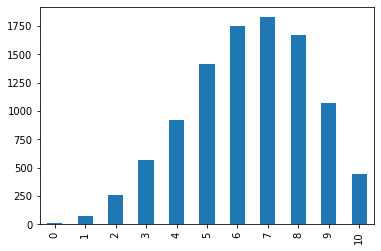

In [22]:
df_post_pred['pred_post'].value_counts().sort_index().plot(kind='bar')

In [24]:
df_post_pred['post_sample'].mean()

0.6370088918602466

Books code

In [34]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [37]:
p_grid = np.linspace(0,1,1000)
prior = np.array([1]*1000)
likelihood = binom.pmf(6,9,p=p_grid)
posterior = likelihood * prior
posterior = posterior / posterior.sum()


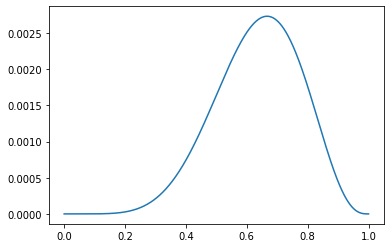

In [38]:
plt.plot(p_grid,posterior)

In [39]:
df_post_pred['post_sample'].quantile(0.1),df_post_pred['post_sample'].quantile(0.9)

(0.4461098669780931, 0.8143284191620047)